In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as pl
import scipy as sp

Function for a double Gaussian:

In [3]:
def make_double_gaussian(hd,parms):
    
    a1,mu1,sig1,a2,mu2,sig2 = parms
    
    vals = a1*np.exp(-1.*(hd-mu1)**2/(2.*sig1**2)) + a2*np.exp(-1.*(hd-mu2)**2/(2.*sig2**2))
    
    return vals

Make some fake data as a test input:

In [20]:
pmodel = [50.,400.,100.,150.,900.,150.]
hd = np.arange(200.,1000.,5.)

vals = make_double_gaussian(hd,pmodel)

# turn the prediction into Poisson dsitributed counts:
vals = np.random.poisson(vals)

See what it looks like:

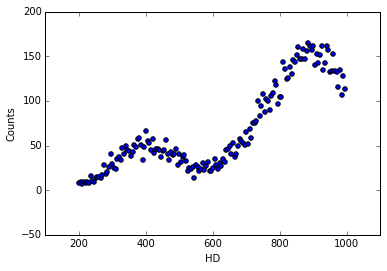

In [26]:
pl.subplot(111)
pl.scatter(hd,vals)
pl.xlabel("HD")
pl.ylabel("Counts")
pl.show()

Define a cost function to optimise:

In [27]:
def nll(parms,hd,vals):
    
    test = make_double_gaussian(hd,parms)
    
    # Poisson negative loglikelihood:
    # NOTE: if there are any zero-valued data points in
    # your prediction (test) this will return a NaN.
    ll = -np.sum(test) + np.sum(vals*np.log(test)) - np.sum(sp.special.gammaln(vals + 1))
    nll = -1.*ll
    
    # L2 norm:
    #nll = np.sum((test - vals)**2)
    
    return nll

Use the scipy optimise routine to fit optimized parameters (popt):

In [28]:
import scipy.optimize as op

p0 = [10.,400.,10.,10.,900.,10.]

popt = op.minimize(nll, p0, args=(hd,vals))

Print the optimized parameters:

In [29]:
print popt.x

[  50.5421877   402.48519972  -97.04930492  151.33393999  896.17948024
  146.73043618]


Plot the prediction over the input test data:

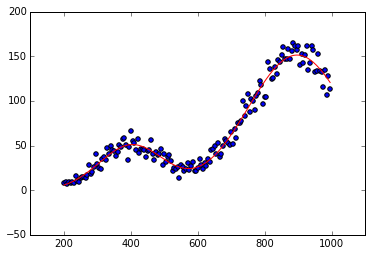

In [30]:
fitted = make_double_gaussian(hd,popt.x)

pl.subplot(111)
pl.scatter(hd,vals)
pl.plot(hd,fitted,c='r')
pl.show()